In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re
import seaborn as sns
from collections import Counter
from prettytable import PrettyTable
import numpy as n

#Gerar dataframe

In [2]:
#projeto do github https://github.com/guto-alves/loterias-api

url = "https://loteriascaixa-api.herokuapp.com/api/megasena/"

response = requests.get(url)
data = response.json()

concursos_data = []

for concurso in data:
    concursos_data.append(concurso)

df = pd.DataFrame(concursos_data)

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y', errors='coerce')

df['dezenas'] = df['dezenas'].apply(lambda x: [int(d) for d in x])

pd.set_option('display.max_columns', None)
print(df.head(1))

    loteria  concurso       data                                local  \
0  megasena      2810 2024-12-31  ESTÚDIO REDE GLOBO em SÃO PAULO, SP   

        dezenasOrdemSorteio                  dezenas trevos timeCoracao  \
0  [50, 17, 29, 57, 01, 19]  [1, 17, 19, 29, 50, 57]     []        None   

  mesSorte                                         premiacoes  \
0     None  [{'descricao': '6 acertos', 'faixa': 1, 'ganha...   

  estadosPremiados observacao  acumulou  proximoConcurso dataProximoConcurso  \
0               []                False             2811          04/01/2025   

                                     localGanhadores  valorArrecadado  \
0  [{'ganhadores': 2, 'municipio': 'BRASILIA', 'n...     2.490297e+09   

   valorAcumuladoConcurso_0_5  valorAcumuladoConcursoEspecial  \
0                         0.0                             0.0   

   valorAcumuladoProximoConcurso  valorEstimadoProximoConcurso  
0                            0.0                     3500000.0  


In [3]:
def extrair_local(local):
    pattern = r"em (.*?), (.*)"
    match = re.search(pattern, local)
    if match:
        municipio, uf = match.groups()
        return municipio, uf
    else:
        return None, None

df[['municipioSorteio', 'ufSorteio']] = df['local'].apply(extrair_local).apply(pd.Series)


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   loteria                         2810 non-null   object        
 1   concurso                        2810 non-null   int64         
 2   data                            2810 non-null   datetime64[ns]
 3   local                           2810 non-null   object        
 4   dezenasOrdemSorteio             2810 non-null   object        
 5   dezenas                         2810 non-null   object        
 6   trevos                          2810 non-null   object        
 7   timeCoracao                     0 non-null      object        
 8   mesSorte                        0 non-null      object        
 9   premiacoes                      2810 non-null   object        
 10  estadosPremiados                2810 non-null   object        
 11  obse

,concurso,data,proximoConcurso,valorArrecadado,valorAcumuladoConcurso_0_5,valorAcumuladoConcursoEspecial,valorAcumuladoProximoConcurso,valorEstimadoProximoConcurso
count,2810.000000,2810,2810.000000,2.810000e+03,2.810000e+03,2.810000e+03,2.810000e+03,2.810000e+03
mean,1405.500000,2012-03-15 13:27:07.046263296,1406.500000,3.654549e+07,1.100415e+07,2.608283e+07,1.786034e+07,2.018189e+07
min,1.000000,1996-03-11 00:00:00,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,703.250000,2005-10-02 00:00:00,704.250000,0.000000e+00,3.707956e+06,0.000000e+00,1.077199e+06,0.000000e+00
50%,1405.500000,2012-07-12 12:00:00,1406.500000,2.800459e+07,6.737557e+06,1.398759e+07,9.496952e+06,6.000000e+06
75%,2107.750000,2018-12-17 06:00:00,2108.750000,4.607823e+07,1.178292e+07,4.581138e+07,2.514969e+07,2.850000e+07
max,2810.000000,2024-12-31 00:00:00,2811.000000,2.490297e+09,2.670063e+08,1.735093e+08,2.670063e+08,6.000000e+08
std,811.321453,NaN,811.321453,1.002167e+08,1.694801e+07,3.059910e+07,2.562600e+07,3.734973e+07


In [5]:
tabela = PrettyTable(['Dezena', 'Frequência'])
todas_dezenas = [dezena for dezenas in df['dezenas'] for dezena in dezenas]
frequencia_dezenas = Counter(todas_dezenas)
for dezena, frequencia in frequencia_dezenas.most_common(12):
    tabela.add_row([dezena, frequencia])
print(tabela)


+--------+------------+
| Dezena | Frequência |
+--------+------------+
|   10   |    329     |
|   53   |    319     |
|   33   |    306     |
|   34   |    305     |
|   5    |    303     |
|   37   |    302     |
|   42   |    299     |
|   35   |    298     |
|   32   |    298     |
|   23   |    298     |
|   44   |    298     |
|   38   |    297     |
+--------+------------+


In [6]:
df["data"] = pd.to_datetime(df["data"])
df_31dez = df[df["data"].dt.month == 12][df["data"].dt.day == 31]

resul_31dez = df_31dez = df_31dez[["data","dezenas"]]
print(resul_31dez)

           data                   dezenas
0    2024-12-31   [1, 17, 19, 29, 50, 57]
140  2023-12-31  [21, 24, 33, 41, 48, 56]
260  2022-12-31    [4, 5, 10, 34, 58, 59]
370  2021-12-31  [12, 15, 23, 32, 33, 46]
480  2020-12-31  [17, 20, 22, 35, 41, 42]
590  2019-12-31   [3, 35, 38, 40, 57, 58]
700  2018-12-31   [5, 10, 12, 18, 25, 33]
810  2017-12-31    [3, 6, 10, 17, 34, 37]
920  2016-12-31   [5, 11, 22, 24, 51, 53]
1035 2015-12-31   [2, 18, 31, 42, 51, 56]
1145 2014-12-31    [1, 5, 11, 16, 20, 56]
1250 2013-12-31  [20, 30, 36, 38, 47, 53]
1355 2012-12-31  [14, 32, 33, 36, 41, 52]
1460 2011-12-31    [3, 4, 29, 36, 45, 55]
1565 2010-12-31   [2, 10, 34, 37, 43, 50]
1670 2009-12-31  [10, 27, 40, 46, 49, 58]
1775 2008-12-31   [1, 11, 26, 51, 59, 60]
1879 2007-12-31   [7, 17, 19, 34, 36, 39]
1981 2006-12-31  [10, 14, 32, 47, 50, 56]
2085 2005-12-31    [3, 9, 35, 37, 41, 49]
2610 1999-12-31  [12, 15, 19, 34, 44, 51]
2662 1998-12-31  [32, 35, 41, 55, 58, 59]


<ipython-input-6-e360bbef99bc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_31dez = df[df["data"].dt.month == 12][df["data"].dt.day == 31]


In [7]:
df["data"] = pd.to_datetime(df["data"])
df_31dez = df[df["data"].dt.month == 12][df["data"].dt.day == 31]

resul_31dez = df_31dez["dezenas"].explode()

frequencia = resul_31dez.value_counts()

faixas = resul_31dez.apply(
    lambda x: "1-10" if 1 <= x <= 10 else
              "11-20" if 11 <= x <= 20 else
              "21-30" if 21 <= x <= 30 else
              "31-40" if 31 <= x <= 40 else
              "41-50" if 41 <= x <= 50 else
              "51-60"
).value_counts().to_dict()

repeticoes = [
    set(df_31dez.iloc[i]["dezenas"]) & set(df_31dez.iloc[i + 1]["dezenas"])
    for i in range(len(df_31dez) - 1)
]

resultados = {
    "Frequência de cada número (top 12)": frequencia.head(12).to_dict(),
    "Distribuição por faixa de dezenas": faixas,
    "Repetição de números em anos consecutivos": repeticoes
}

for titulo, valor in resultados.items():
    print(f"{titulo}:\n{valor}\n")


Frequência de cada número (top 12):
{10: 6, 34: 5, 41: 5, 56: 4, 3: 4, 35: 4, 32: 4, 51: 4, 58: 4, 5: 4, 17: 4, 36: 4}

Distribuição por faixa de dezenas:
{'31-40': 30, '1-10': 24, '11-20': 23, '51-60': 23, '41-50': 20, '21-30': 12}

Repetição de números em anos consecutivos:
[set(), set(), set(), set(), {35}, set(), {10}, set(), {51}, {56}, {20}, {36}, {36}, set(), {10}, set(), set(), set(), set(), set(), set()]



<ipython-input-7-d8e6d2561056>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_31dez = df[df["data"].dt.month == 12][df["data"].dt.day == 31]


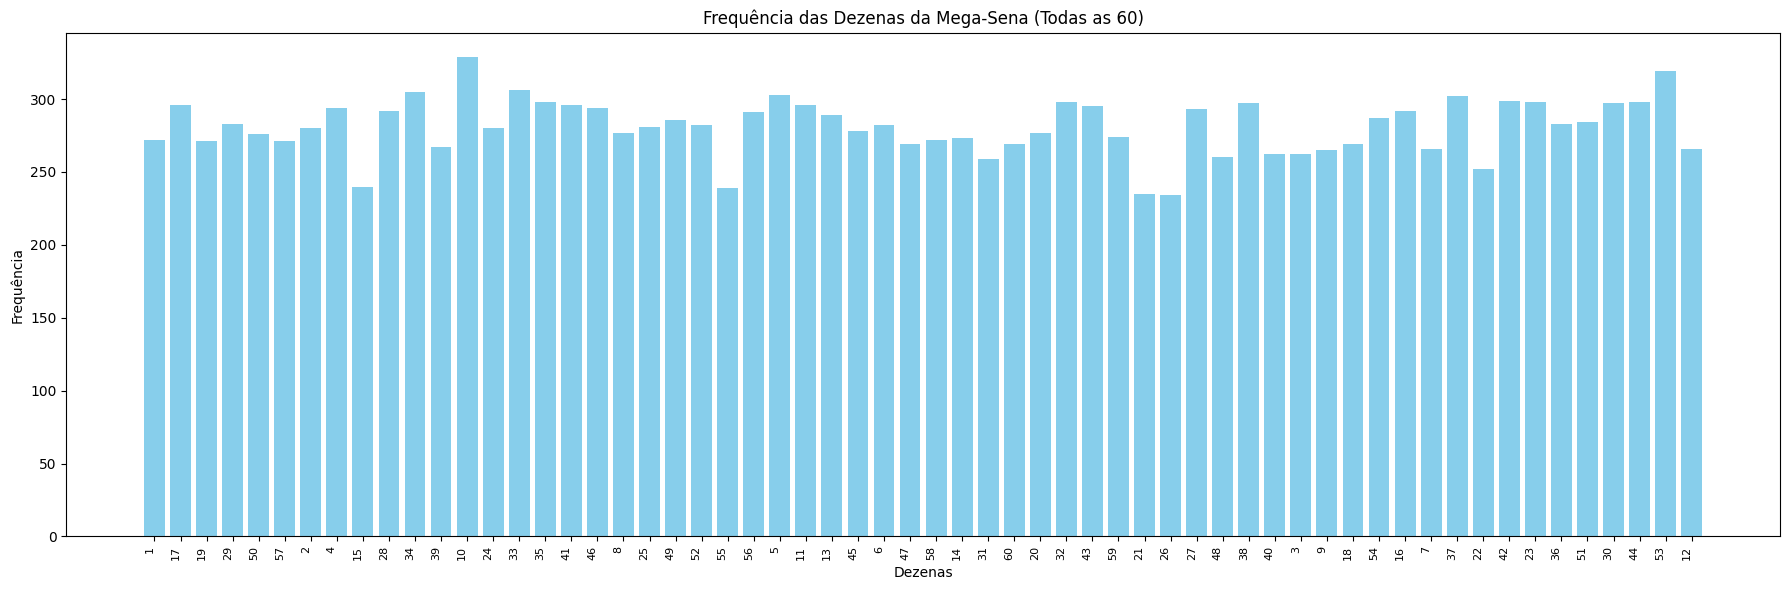

In [8]:
dezenas = [str(dezena) for dezena, frequencia in frequencia_dezenas.items()]
frequencias = [frequencia for dezena, frequencia in frequencia_dezenas.items()]

plt.figure(figsize=(18, 6))
plt.bar(dezenas, frequencias, color='skyblue')
plt.title('Frequência das Dezenas da Mega-Sena (Todas as 60)')
plt.xlabel('Dezenas')
plt.ylabel('Frequência')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

# Gráficos

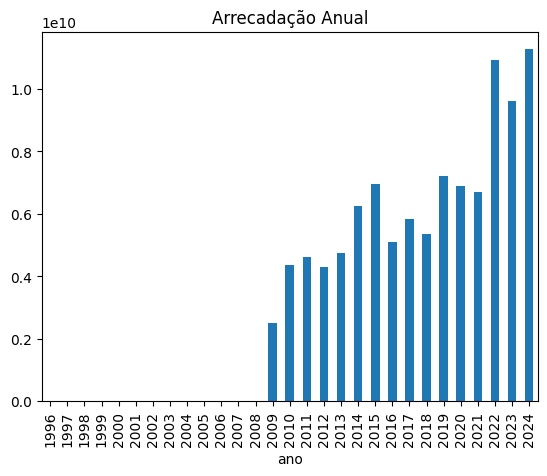

In [9]:
import matplotlib.pyplot as plt
df['ano'] = df['data'].dt.year
df.groupby('ano')['valorArrecadado'].sum().plot(kind='bar')
plt.title('Arrecadação Anual')
plt.show()


## Escrever o Readme.md

In [10]:
with open('/content/README.md','w') as f:
    f.write('README\n')
    f.write('---\n')
    f.write('# Estrutura dos Dados da Mega-Sena\n')
    f.write('## Descrição Geral\n')
    f.write('Este conjunto de dados contém informações detalhadas sobre os resultados dos concursos da Mega-Sena, incluindo dados sobre os números sorteados, premiações, e outras informações relevantes.\n')
    f.write('## Conteúdo\n')
    f.write('Usei o projeto do github https://github.com/guto-alves/loterias-api para gerar o dataframe.\n')
    f.write('Cada registro representa um concurso específico e contém os seguintes campos:\n')
    f.write('* **loteria:** Indica o tipo de loteria (neste caso, sempre "megasena").\n')
    f.write('* **concurso:** Número do concurso.\n')
    f.write('* **data:** Data do sorteio.\n')
    f.write('* **local:** Local onde o sorteio foi realizado.\n')
    f.write('* **dezenasOrdemSorteio:** Lista das dezenas na ordem em que foram sorteadas.\n')
    f.write('* **dezenas:** Lista das dezenas ordenadas numericamente.\n')
    f.write('* **trevos, timeCoracao, mesSorte:** Campos geralmente vazios para a Mega-Sena, utilizados em outras modalidades de loteria.\n')
    f.write('* **premiacoes:** Um objeto contendo informações detalhadas sobre as premiações, como faixas, número de ganhadores e valores.\n')
    f.write('* **estadosPremiados:** Lista dos estados onde houve ganhadores.\n')
    f.write('* **observacao:** Informações adicionais sobre o concurso.\n')
    f.write('* **acumulou:** Indica se houve acúmulo de prêmio (True/False).\n')
    f.write('* **proximoConcurso:** Número do próximo concurso.\n')
    f.write('* **dataProximoConcurso:** Data estimada para o próximo concurso.\n')
    f.write('* **localGanhadores:** Detalhes sobre os ganhadores, incluindo quantidade e localização.\n')
    f.write('* **valorArrecadado:** Valor total arrecadado no concurso.\n')
    f.write('* **valorAcumuladoConcurso_0_5:** Valor acumulado em faixas específicas.\n')
    f.write('* **valorAcumuladoConcursoEspecial:** Valor acumulado para concursos especiais.\n')
    f.write('* **valorAcumuladoProximoConcurso:** Valor acumulado para o próximo concurso.\n')
    f.write('* **valorEstimadoProximoConcurso:** Valor estimado para o prêmio do próximo concurso.\n')
    f.write('* **municipioSorteio:** Município onde o sorteio ocorreu.\n')
    f.write('* **ufSorteio:** Estado onde o sorteio ocorreu.\n')
    f.write('* **ano:** Ano do concurso.\n')
    f.write('## Limpeza de Dados\n')
    f.write('Para garantir a qualidade dos dados, foram realizadas as seguintes etapas de limpeza:\n')

